# **AVANCE 1. ANÁLISIS EXPLORATORIO DE DATOS**

Importación de librerías

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

Función para convertir la carpeta de imágenes en una tabla

In [ ]:
def load_image_metadata(image_dir):
    data = []

    for img_name in tqdm(os.listdir(image_dir)):
        img_path = os.path.join(image_dir, img_name)

        try:
            img = cv2.imread(img_path)
            if img is None:
                raise ValueError("Imagen corrupta")

            h, w, c = img.shape
            aspect_ratio = w / h
            size_kb = os.path.getsize(img_path) / 1024

            data.append({
                "image_name": img_name,
                "width": w,
                "height": h,
                "channels": c,
                "aspect_ratio": aspect_ratio,
                "size_kb": size_kb
            })
        except:
            data.append({
                "image_name": img_name,
                "width": None,
                "height": None,
                "channels": None,
                "aspect_ratio": None,
                "size_kb": None
            })

    return pd.DataFrame(data)


In [ ]:
image_dir = r"C:\Users\L03553330\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\Escritorio\SROIE2019\test\img"

df = load_image_metadata(image_dir)

df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 347/347 [00:58<00:00,  5.96it/s]


,image_name,width,height,channels,aspect_ratio,size_kb
0,X00016469670.jpg,463,894,3,0.517897,153.148438
1,X00016469671.jpg,463,776,3,0.596649,128.455078
2,X51005200931.jpg,992,1403,3,0.707056,244.544922
3,X51005230605.jpg,616,1336,3,0.461078,407.803711
4,X51005230616.jpg,608,1830,3,0.332240,374.819336


 No se detectaron valores nulos dentro de la base. Hay que aclarar que como valor nulo se toman en cuenta aquellas imágenes corruptas, faltantes y/o tamaños inválidos

In [ ]:
df.isnull().sum()

image_name      0
width           0
height          0
channels        0
aspect_ratio    0
size_kb         0
dtype: int64

 # **Estadísticas resumidas**

Existe una dispersión significativa en el ancho de las imágenes. La diferencia entre el valor mínimo y máximo indica que los tickets no siguen un formato de resolución uniforme.

Alta variabilidad en las dimensiones y el tamaño de las imágenes de los tickets de venta.

In [ ]:
df.describe()


,width,height,channels,aspect_ratio,size_kb
count,347.000000,347.000000,347.0,347.000000,347.000000
mean,1420.541787,2483.097983,3.0,0.520261,579.050714
std,1498.547999,1948.202747,0.0,0.119737,625.209455
min,435.000000,776.000000,3.0,0.258861,104.113281
25%,703.000000,1411.500000,3.0,0.429508,264.200684
50%,880.000000,1728.000000,3.0,0.503268,343.809570
75%,935.000000,2211.500000,3.0,0.603425,550.621094
max,4961.000000,7016.000000,3.0,0.739324,4152.932617


# **Valores atípicos (outliers)**
No todos los tickets fueron capturados bajo las mismas condiciones, debido a la variación de su tamaño y resolución.
La altura presenta mayor dispersión que el ancho, lo cual es esperable en tickets.

Los valores atípicos pueden afectar el desempeño y el costo computacional del modelo si no se controlan.

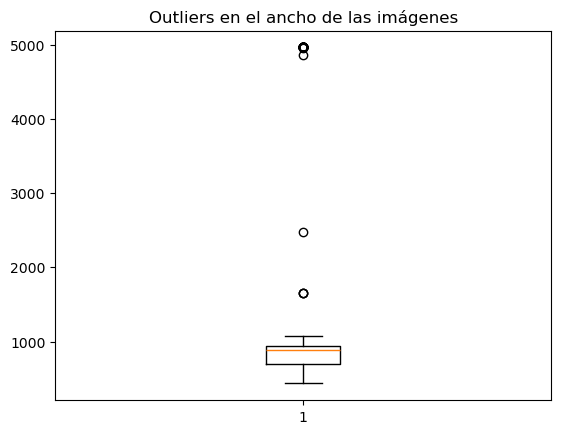

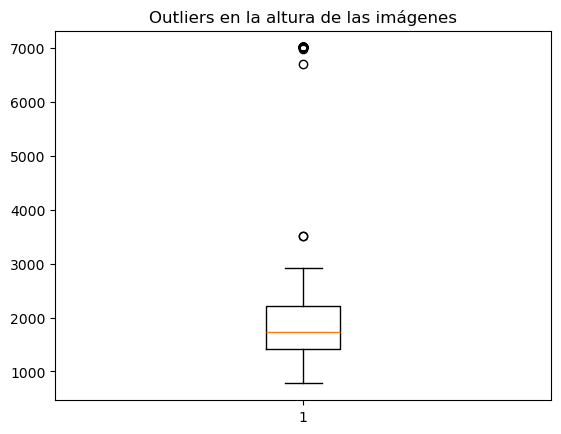

In [ ]:
plt.boxplot(df["width"].dropna())
plt.title("Outliers en el ancho de las imágenes")
plt.show()

plt.boxplot(df["height"].dropna())
plt.title("Outliers en la altura de las imágenes")
plt.show()

# **Distribuciones sesgadas**

La distribución del aspect ratio presenta una asimetría hacia valores menores a 1, lo que indica una predominancia de imágenes con orientación vertical, aunque con variabilidad estructural.

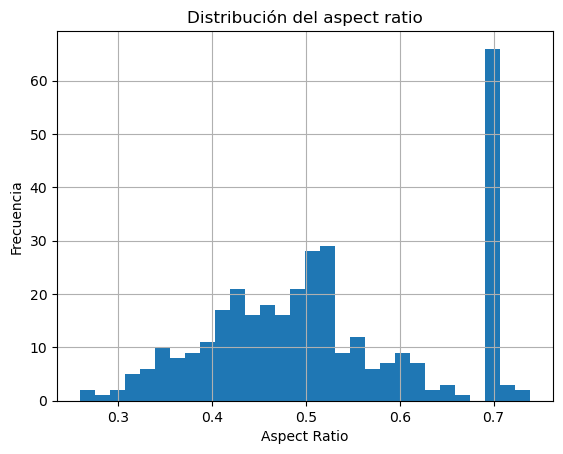

In [ ]:
df["aspect_ratio"].hist(bins=30)
plt.title("Distribución del aspect ratio")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frecuencia")
plt.show()


# **Análisis bivariado (ejemplo ancho vs alto)**

Se representa la relación entre el ancho y la altura de las imágenes de los tickets.
Se observa una relación positiva entre el ancho y la altura:
A mayor ancho, generalmente mayor altura.

Esto indica que las imágenes crecen de forma proporcional, manteniendo cierta coherencia estructural.}


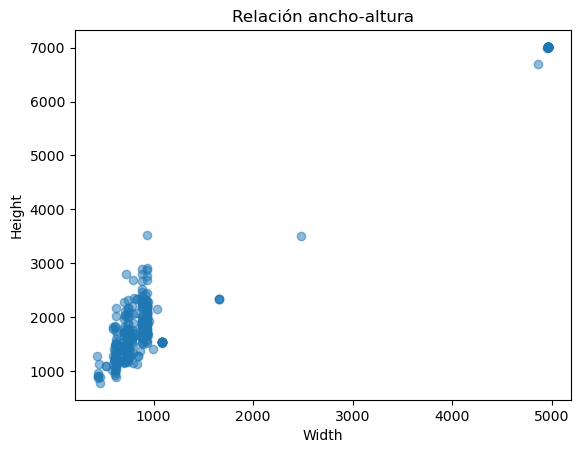

In [ ]:
plt.scatter(df["width"], df["height"], alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Relación ancho-altura")
plt.show()

# **Correlación entre variables**:

La matriz de correlación muestra una relación altamente positiva entre el ancho y la altura de las imágenes, lo que indica que las dimensiones de los tickets mantienen proporciones consistentes.

Estos resultados refuerzan la necesidad de estandarizar las dimensiones de entrada y confirman que gran parte de la variabilidad estructural puede capturarse mediante representaciones visuales aprendidas por modelos de aprendizaje profundo.

In [ ]:
df[["width", "height", "aspect_ratio", "size_kb"]].corr()

,width,height,aspect_ratio,size_kb
width,1.000000,0.985137,0.679515,0.843730
height,0.985137,1.000000,0.553234,0.846177
aspect_ratio,0.679515,0.553234,1.000000,0.493865
size_kb,0.843730,0.846177,0.493865,1.000000


# **Conclusión**
El análisis exploratorio de datos permitió comprender las características visuales y estructurales de un conjunto de imágenes de tickets de venta, identificando una alta variabilidad en dimensiones, relación de aspecto y tamaño de archivo.

Es importante destacar que el conjunto de datos utilizado en esta etapa no corresponde al dataset original del proyecto, sino que fue empleado con fines demostrativos, con el objetivo de ilustrar el tipo de análisis exploratorio que se llevará a cabo una vez que se disponga de los datos reales proporcionados por la empresa.

En el desarrollo del análisis se lograron cubrir los principales objetivos del ejercicio con el conjunto de datos proporcionado. Sin embargo, debido a que no se contó con el data set real, algunos aspectos solicitados en las preguntas —como el análisis de tendencias temporales, la evaluación de la cardinalidad de variables categóricas y la normalización de imágenes— no pudieron ser abordados. Estos puntos podrían incorporarse en una versión futura del análisis al disponer de datos completos y representativos